In [1]:
import pickle
from matplotlib import pyplot as plt
from darts import timeseries # Timeseries class

from forecasting.data_fetcher import DataFetcher
from forecasting.forecaster import Forecaster
from fsite_data import *

In [2]:
refetch_data = True  
if refetch_data:
    illinois_kerby = DataFetcher("14377100", illinois_kerby_weather_sources  )
    pickle_out = open("temp_storage/data_fetcher.pickle", "wb")
    pickle.dump(illinois_kerby, pickle_out)
    pickle_out.close()
else:
    pickle_in = open("temp_storage/data_fetcher.pickle", "rb")
    illinois_kerby = pickle.load(pickle_in)

In [3]:
rebuild_forecaster = True
def test(num):
    pass
if rebuild_forecaster:
    frcstr = Forecaster(illinois_kerby, test)
    pickle_out = open("temp_storage/forecaster.pickle", "wb")
    pickle.dump(frcstr, pickle_out)
    pickle_out.close()
else:
    pickle_in = open("temp_storage/forecaster.pickle", "rb")
    frcstr = pickle.load(pickle_in)

Building dataset


C:\Users\orion\anaconda3\envs\darts\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\general_utilities\df_utils.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = scaler.fit_transform(df[df.columns])
C:\Users\orion\anaconda3\envs\darts\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

233498
233493
233498
233493
(5, 8, 1)
(5, 8, 1)


In [4]:
covariates = frcstr.dataset.X_historical_processed.iloc[:,:-1]
series = timeseries.TimeSeries.from_dataframe(frcstr.dataset.y_historical_processed)
past_covariates = timeseries.TimeSeries.from_dataframe(covariates)

In [5]:
train_past_covariates, test_past_covariates = past_covariates.split_before(0.85)
train_series, test_series = series.split_before(0.85)

In [6]:
retrain = True

In [7]:
from darts.models import BlockRNNModel
block_rnn = BlockRNNModel(input_chunk_length=120, output_chunk_length=72)
if retrain:
    block_rnn.fit(train_series, past_covariates=train_past_covariates, verbose=True)
    block_rnn.save_model("trained_models/block_rnn.pth.tar")
else:
    model = block_rnn.load_model("trained_models/block_rnn.pth.tar")

[2022-02-08 18:44:59,755] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247904 samples.
[2022-02-08 18:44:59,755] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247904 samples.
[2022-02-08 18:44:59,763] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-08 18:44:59,763] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/100 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'trained_models/block_rnn.pth.tar'

In [9]:
from darts.models import TFTModel
tft = TFTModel(input_chunk_length=120, output_chunk_length=72)
retrain = True
if retrain:
    tft.fit(train_series, past_covariates=train_past_covariates, verbose=True)
    tft.save_model("trained_models/tft.pth.tar")
else:
    model = tft.load_model("trained_models/tft.pth.tar")

[2022-02-08 22:16:58,545] ERROR | darts.models.forecasting.tft_model | ValueError: TFTModel requires future covariates. The model applies multi-head attention queries on future inputs. Consider specifying a future encoder with `add_encoders` or setting `add_relative_index` to `True` at model creation (read TFT model docs for more information). These will automatically generate `future_covariates` from indexes.
[2022-02-08 22:16:58,545] ERROR | darts.models.forecasting.tft_model | ValueError: TFTModel requires future covariates. The model applies multi-head attention queries on future inputs. Consider specifying a future encoder with `add_encoders` or setting `add_relative_index` to `True` at model creation (read TFT model docs for more information). These will automatically generate `future_covariates` from indexes.


ValueError: TFTModel requires future covariates. The model applies multi-head attention queries on future inputs. Consider specifying a future encoder with `add_encoders` or setting `add_relative_index` to `True` at model creation (read TFT model docs for more information). These will automatically generate `future_covariates` from indexes.

In [10]:
from darts.models import NBEATSModel
n_beats = NBEATSModel(input_chunk_length=120, output_chunk_length=72)
retrain = True
if retrain:
    n_beats.fit(train_series, past_covariates=train_past_covariates, verbose=True)
    n_beats.save_model("trained_models/n_beats.pth.tar")
else:
    model = n_beats.load_model("trained_models/n_beats.pth.tar")

[2022-02-08 22:17:17,773] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247904 samples.
[2022-02-08 22:17:17,773] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247904 samples.
[2022-02-08 22:17:17,835] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-08 22:17:17,835] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
from darts.models import TransformerModel
transformer = TransformerModel(input_chunk_length=120, output_chunk_length=72)
retrain = True    
if retrain:
    transformer.fit(train_series, past_covariates=train_past_covariates, verbose=True)
    transformer.save_model("trained_models/transformer.pth.tar")
else:
    model = transformer.load_model("trained_models/transformer.pth.tar")

[2022-02-09 17:45:06,954] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247904 samples.
[2022-02-09 17:45:06,954] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247904 samples.
[2022-02-09 17:45:06,971] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-09 17:45:06,971] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
from darts.models import TCNModel
tcn = TCNModel(input_chunk_length=120, output_chunk_length=72)
retrain = True
if retrain:
    tcn.fit(train_series, past_covariates=train_past_covariates, verbose=True)
    tcn.save_model("trained_models/tcn.pth.tar")
else:
    model = tcn.load_model("trained_models/tcn.pth.tar")

[2022-02-10 05:00:43,806] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247904 samples.
[2022-02-10 05:00:43,806] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247904 samples.
[2022-02-10 05:00:43,811] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 5
[2022-02-10 05:00:43,811] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 5
[2022-02-10 05:00:43,814] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-10 05:00:43,814] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
from darts.models import RNNModel
rnn = RNNModel(input_chunk_length=120, output_chunk_length=72)
retrain = True
if retrain:
    rnn.fit(train_series, past_covariates=train_past_covariates, verbose=True)
    rnn.save_model("trained_models/rnn.pth.tar")
else:
    model = rnn.load_model("trained_models/rnn.pth.tar")

[2022-02-10 07:09:52,603] ERROR | main_logger | ValueError: Some past_covariates have been provided to a PastCovariates model. These models support only future_covariates.
[2022-02-10 07:09:52,603] ERROR | main_logger | ValueError: Some past_covariates have been provided to a PastCovariates model. These models support only future_covariates.
[2022-02-10 07:09:52,603] ERROR | main_logger | ValueError: Some past_covariates have been provided to a PastCovariates model. These models support only future_covariates.
[2022-02-10 07:09:52,603] ERROR | main_logger | ValueError: Some past_covariates have been provided to a PastCovariates model. These models support only future_covariates.


ValueError: Some past_covariates have been provided to a PastCovariates model. These models support only future_covariates.

In [14]:
print("ALL MODELS TRAINED AND STORED") 
model = n_beats

ALL MODELS TRAINED AND STORED


In [ ]:
#model.backtest(series=train_series, past_covariates=past_covariates, forecast_horizon=24, stride=96, retrain=False, verbose=True)

In [19]:
results = model.historical_forecasts(series=test_series, past_covariates=past_covariates,  num_samples=1, start=0.5, forecast_horizon=24, stride=4, retrain=False, overlap_end=False, last_points_only=True, verbose=True)

  0%|          | 0/5468 [00:00<?, ?it/s]

In [20]:
results
df = results.pd_dataframe()
target_scaler = frcstr.dataset.target_scaler
df['0'] = target_scaler.inverse_transform(df)
df

component,0
time,
2019-07-21 11:00:00,29.247747
2019-07-21 15:00:00,19.010550
2019-07-21 19:00:00,7.085533
2019-07-21 23:00:00,-11.068514
2019-07-22 03:00:00,5.909363
...,...
2022-01-16 23:00:00,1323.496579
2022-01-17 03:00:00,1304.548810
2022-01-17 07:00:00,1288.808430


In [21]:
y_true = test_series[500:]
df_true = y_true.pd_dataframe().iloc[500:, :]
target_scaler = frcstr.dataset.target_scaler
df_true['level'] = target_scaler.inverse_transform(df_true)

In [22]:
df[100:200]

component,0
time,
2019-08-07 03:00:00,-17.335186
2019-08-07 07:00:00,-4.929477
2019-08-07 11:00:00,-12.655690
2019-08-07 15:00:00,-27.049443
2019-08-07 19:00:00,-26.829940
...,...
2019-08-22 23:00:00,-37.989039
2019-08-23 03:00:00,-31.094823
2019-08-23 07:00:00,-35.819584


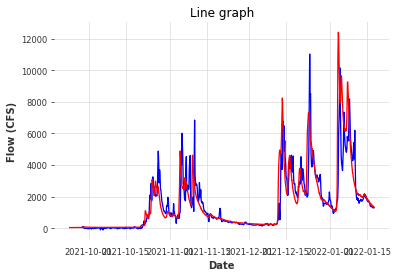

In [30]:
import numpy as np
import matplotlib.pyplot as plt
 
# plotting
plt.title("Line graph")
plt.xlabel("Date")
plt.ylabel("Flow (CFS)")
plt.plot(df[4800:10000], color ="blue")
plt.plot(df_true[40000:200000], color ="red")
plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
y_pred

array([[15223.20841922],
       [14580.62325305],
       [13879.09061818],
       [13260.5453817 ],
       [12691.70103751],
       [12191.26032203],
       [11733.74781936],
       [11303.61650424],
       [10915.79079727],
       [10547.61977245],
       [10221.61029318],
       [ 9942.97185507],
       [ 9702.96736039],
       [ 9489.26975233],
       [ 9292.52535452],
       [ 9138.52306789],
       [ 9028.99203008],
       [ 8954.58713301],
       [ 9002.04540835],
       [ 9025.03268346],
       [ 9170.34512703],
       [ 9326.79039606],
       [ 9517.15557584],
       [ 9640.65618254],
       [ 9701.04768316],
       [ 9655.35607615],
       [ 9588.72313683],
       [ 9483.37038102],
       [ 9375.26171995],
       [ 9257.41223838],
       [ 9137.77454462],
       [ 9039.1890783 ],
       [ 8921.94777698],
       [ 8793.23259232],
       [ 8646.63348567],
       [ 8508.40900002],
       [ 8380.95807428],
       [ 8266.70962757],
       [ 8145.73957193],
       [ 8056.78461265],
